# Data Overview and EDA

In [1]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate, GridSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import xgboost as xgb
from sklearn.metrics import classification_report, recall_score
from scipy import stats


%matplotlib inline
sns.set()

In [2]:
#loading the training dataset

df_train = pd.read_csv('Dataset/Train.csv', parse_dates=[1]) # a prior quick look allowed for parsing the DATE in index 1 
df_test = pd.read_csv('Dataset/Test.csv', parse_dates=[1])

#glance at the data

print(df_train.head())
print(df_test.head())

  INCIDENT_ID       DATE  X_1  X_2  X_3  X_4  X_5  X_6  X_7  X_8  X_9  X_10  \
0   CR_102659 2004-07-04    0   36   34    2    1    5    6    1    6     1   
1   CR_189752 2017-07-18    1   37   37    0    0   11   17    1    6     1   
2   CR_184637 2017-03-15    0    3    2    3    5    1    0    2    3     1   
3   CR_139071 2009-02-13    0   33   32    2    1    7    1    1    6     1   
4   CR_109335 2005-04-13    0   33   32    2    1    8    3    0    5     1   

   X_11  X_12  X_13  X_14  X_15  MULTIPLE_OFFENSE  
0   174   1.0    92    29    36                 0  
1   236   1.0   103   142    34                 1  
2   174   1.0   110    93    34                 1  
3   249   1.0    72    29    34                 1  
4   174   0.0   112    29    43                 1  
  INCIDENT_ID       DATE  X_1  X_2  X_3  X_4  X_5  X_6  X_7  X_8  X_9  X_10  \
0   CR_195453 2018-02-01    0   30   35    7    3    6    4    0    5     1   
1   CR_103520 2004-03-05    0   44   44    1    3    7 

In [3]:
#pop out the class label from the training dataframe

#pop out the identification column
X_train_ID = df_train.pop('INCIDENT_ID')
X_test_ID = df_test.pop('INCIDENT_ID')

#splitting dates and inserting as new columns

df_train.insert(1,'DAY', df_train['DATE'].dt.day)
df_train.insert(1,'MONTH', df_train['DATE'].dt.month)
df_train.insert(1,'YEAR', df_train['DATE'].dt.year)

df_test.insert(1,'DAY', df_test['DATE'].dt.day)
df_test.insert(1,'MONTH', df_test['DATE'].dt.month)
df_test.insert(1,'YEAR', df_test['DATE'].dt.year)

df_train = df_train.drop(['DATE'],axis=1)
df_test = df_test.drop(['DATE'],axis=1)

#Observing the attributes

print(df_train.info())
print(df_train.describe())

df_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   YEAR              23856 non-null  int64  
 1   MONTH             23856 non-null  int64  
 2   DAY               23856 non-null  int64  
 3   X_1               23856 non-null  int64  
 4   X_2               23856 non-null  int64  
 5   X_3               23856 non-null  int64  
 6   X_4               23856 non-null  int64  
 7   X_5               23856 non-null  int64  
 8   X_6               23856 non-null  int64  
 9   X_7               23856 non-null  int64  
 10  X_8               23856 non-null  int64  
 11  X_9               23856 non-null  int64  
 12  X_10              23856 non-null  int64  
 13  X_11              23856 non-null  int64  
 14  X_12              23674 non-null  float64
 15  X_13              23856 non-null  int64  
 16  X_14              23856 non-null  int64 

,YEAR,MONTH,DAY,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
0,2004,7,4,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0
1,2017,7,18,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1
2,2017,3,15,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1
3,2009,2,13,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1
4,2005,4,13,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1


The feature X_12 has 182 null values. We look at the frequencies of unique values in X_12. 

In [4]:
#filling missing values with the most frequent value
print(df_train['X_12'].value_counts())


1.0     15674
0.0      5171
2.0      2039
3.0       476
4.0       176
5.0        59
6.0        36
8.0         9
10.0        7
9.0         6
7.0         4
11.0        4
15.0        2
20.0        2
17.0        1
58.0        1
50.0        1
40.0        1
16.0        1
90.0        1
12.0        1
30.0        1
14.0        1
Name: X_12, dtype: int64


In [5]:


#replacing null values in X_12 with the most frequent value '1' observed in 65.7% of the feature data. 

df_train['X_12'] = df_train['X_12'].fillna(1)

df_test['X_12'] = df_test['X_12'].fillna(1)



In [2]:
#Visualizing attributes
plt.rcParams["figure.figsize"]=20,20
df_train.plot(kind='density', subplots=True, layout=(5,4), sharex=False)

plt.show()


NameError: name 'plt' is not defined

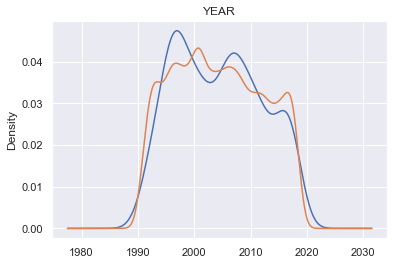

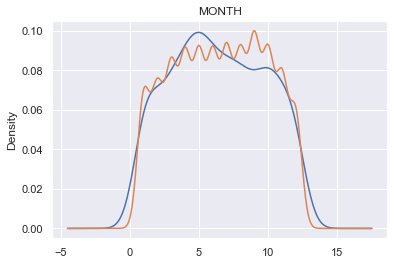

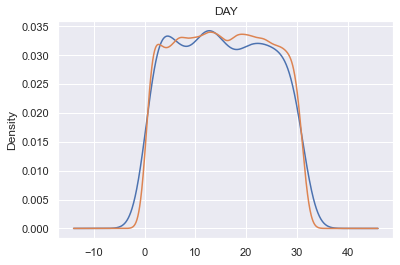

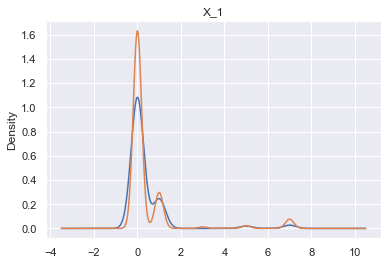

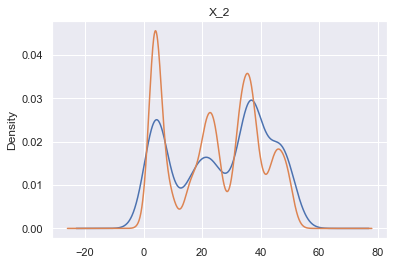

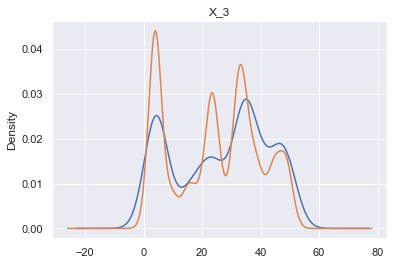

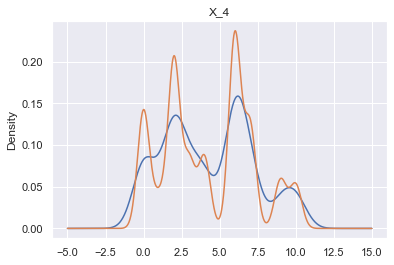

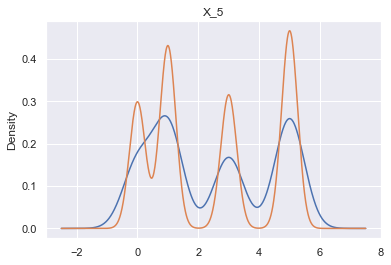

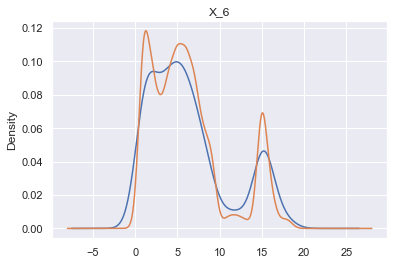

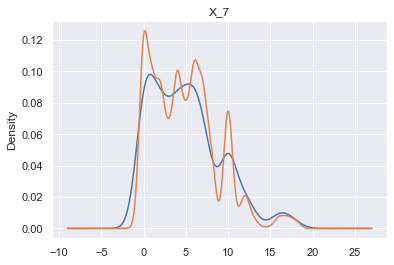

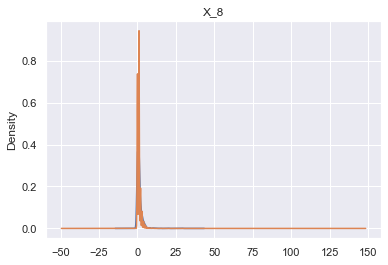

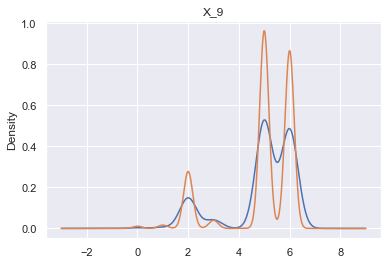

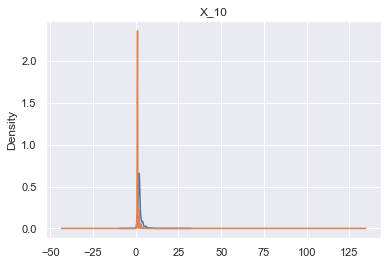

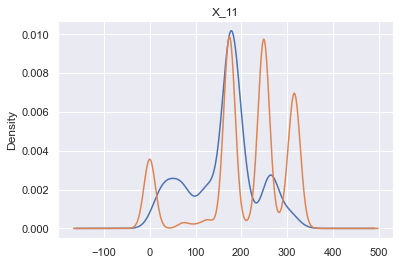

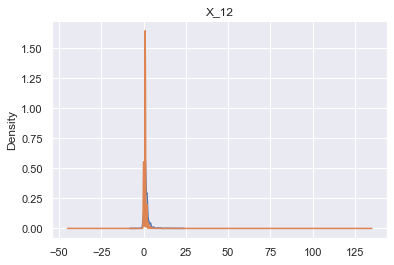

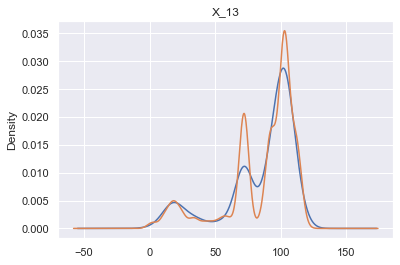

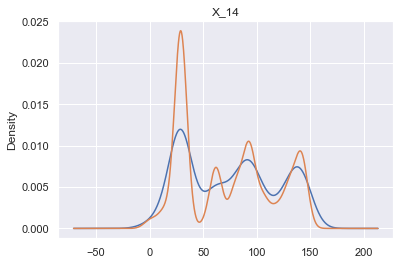

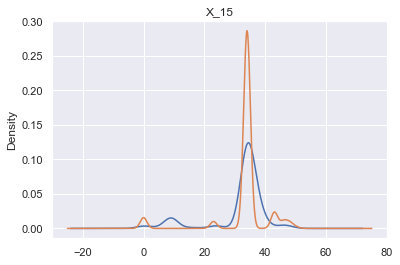

In [7]:
#plotting the features with respect to the class labels to visualize their discriminative power
plt.rcParams["figure.figsize"]=6,4
for i in df_train.columns:
    if i!='MULTIPLE_OFFENSE':
        plt.figure()
        plt.title(i)
        df_train.groupby("MULTIPLE_OFFENSE")[i].plot(kind='kde')
        plt.show()

In [8]:
#pop out the class label from the training dataframe
Y_train = df_train.pop('MULTIPLE_OFFENSE')

#assign the X_train and X_test
X_train = df_train
X_test = df_test


1    0.955231
0    0.044769
Name: MULTIPLE_OFFENSE, dtype: float64

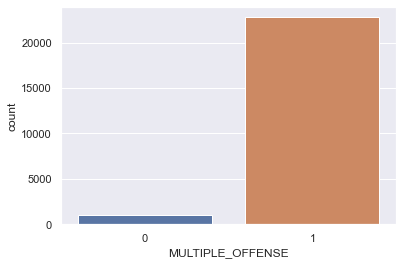

In [9]:
# Visualizing class distribution
sns.countplot(x=Y_train);
Y_train.value_counts()/len(Y_train)

The data is observed to be highly imbalanced with approximately 95.5% being evidence of hack attempts.  

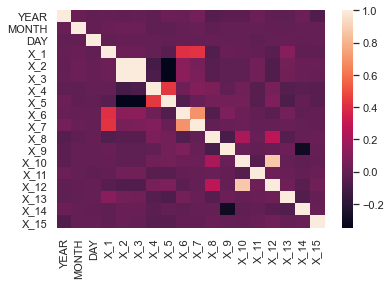

In [10]:
# check correlation among attributes for redundancy
sns.heatmap(X_train.corr())

There is very strong evidence from the heatmap created using pearson correlation coefficient that X_2 and X_3 are highly correlated and thus redundant features. We drop X_3 from our feature set. 

In [11]:
# dropping X_3 from the feature set

X_train = X_train.drop(['X_3'], axis=1)
X_test = X_test.drop(['X_3'], axis=1)# applying same preprocessing on the test set
X_train.head()

,YEAR,MONTH,DAY,X_1,X_2,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
0,2004,7,4,0,36,2,1,5,6,1,6,1,174,1.0,92,29,36
1,2017,7,18,1,37,0,0,11,17,1,6,1,236,1.0,103,142,34
2,2017,3,15,0,3,3,5,1,0,2,3,1,174,1.0,110,93,34
3,2009,2,13,0,33,2,1,7,1,1,6,1,249,1.0,72,29,34
4,2005,4,13,0,33,2,1,8,3,0,5,1,174,0.0,112,29,43


# Baseline

NameError: name 'df_train' is not defined

In [12]:
#inducing a classifier randomforest for baseline performance

clf = RandomForestClassifier()

model_rf = clf.fit(X_train, Y_train)

test_predict = model_rf.predict(X_test)
train_predict = model_rf.predict(X_train)

print(classification_report(train_predict, Y_train))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1068
           1       1.00      1.00      1.00     22788

    accuracy                           1.00     23856
   macro avg       1.00      1.00      1.00     23856
weighted avg       1.00      1.00      1.00     23856



Results are on training data. It is evident that the induced classifier completely overfits the data.

In [13]:
#feature importance obtained from the baseline
importance = model_rf.feature_importances_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))


Feature: 0, Score: 0.04323
Feature: 1, Score: 0.01811
Feature: 2, Score: 0.02360
Feature: 3, Score: 0.00372
Feature: 4, Score: 0.02807
Feature: 5, Score: 0.01657
Feature: 6, Score: 0.01081
Feature: 7, Score: 0.01788
Feature: 8, Score: 0.01643
Feature: 9, Score: 0.01698
Feature: 10, Score: 0.00887
Feature: 11, Score: 0.25216
Feature: 12, Score: 0.24564
Feature: 13, Score: 0.13704
Feature: 14, Score: 0.01945
Feature: 15, Score: 0.01760
Feature: 16, Score: 0.12385


In [14]:
#evaluating the baseline using stratified k-fold cross-validation
cv_model = RandomForestClassifier()
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

cross_validate(cv_model, X_train, Y_train, cv=kfold, scoring = 'recall' )['test_score']
    

array([0.99868363, 0.99890279, 0.99824446, 0.99824484, 0.99978061])

The baseline model performance provides for reference to subsequent improvements. These are highly unreliable results due to bias for majority class and ingenuine validation data as discussed in the answer.

# Model Selection

In [16]:
# dropping the features based on experimented results using feature_importance of xgboost classifier

X_train1 = X_train.drop(['X_2','YEAR', 'X_1','X_6', 'X_7', 'X_8','X_12', 'X_13','X_14','MONTH','X_4','X_5','X_9','DAY'], axis=1)
X_test1 = X_test.drop(['X_2','YEAR', 'X_1', 'X_6', 'X_7', 'X_8','X_12', 'X_13','X_14','MONTH','X_4','X_5','X_9','DAY'], axis=1)

#creating a copy (before synthetic data creation) for model evaluation
X_train2 = X_train1

In [17]:
#oversampling the minority class and undersampling the majority using SOMET and RandomUnderSampler respectively.
# The sampling strategy is optimized by experimentation

ros = SMOTE(sampling_strategy= 0.4, random_state=0)
X_train1, Y_train1 = ros.fit_resample(X_train1, Y_train)
ros2 = RandomUnderSampler(sampling_strategy=0.4, random_state = 40)
X_train1, Y_train1 = ros2.fit_resample(X_train1, Y_train1)

In [18]:
#using xgboost based on experimented superior result and fitting on the synthetic data

clf1 = xgb.XGBClassifier(
 learning_rate=0.3,
 n_estimators = 1000,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=2.5,
 max_depth = 7,
 gamma =0,
 subsample=0.7,
 colsample_bytree=0.8,
 seed=42)

model_xgb = clf1.fit(X_train1, Y_train1)



In [19]:
#training set recall score
train_predcit_xgb = model_xgb.predict(X_train1)
print(recall_score(train_predcit_xgb, Y_train1))

0.9991668859072174


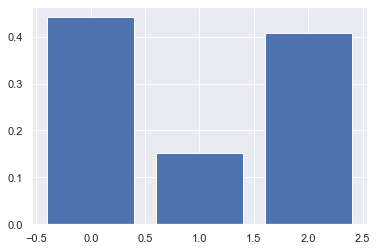

[0.44137627 0.15156384 0.4070599 ]


In [20]:
#observing the feature importance from xgboost
plt.bar(range(len(model_xgb.feature_importances_)), model_xgb.feature_importances_)
plt.show()

print(model_xgb.feature_importances_)

# Model Evaluation

In [22]:
#stratified k-fold cross-validation for synthetic data while maintaining the original class imbalance

#declaring a list for recall scores
cross_val_recall_lst_xg = []


for train_index_ls, validation_index_ls in kfold.split(X_train2, Y_train):
    # keeping validation set apart and oversampling in each iteration using smote 
    train, validation = X_train2.iloc[train_index_ls], X_train2.iloc[validation_index_ls]
    target_train, target_val = Y_train.iloc[train_index_ls], Y_train.iloc[validation_index_ls]
    
    #smoting
    sm = SMOTE(sampling_strategy=0.4,random_state=42)
    X_train_res, y_train_res = sm.fit_sample(train, target_train)
    #undersampling
    sm2 = RandomUnderSampler(sampling_strategy=0.4, random_state = 42)
    X_train_res, y_train_res = sm2.fit_sample(X_train_res, y_train_res)
    
    
    # training the model on oversampled 5 folds of training set
    model_cross = clf1.fit(X_train_res, y_train_res)
    
    # testing on 1 fold of validation set
    validation_preds = model_cross.predict(validation)
    cross_val_recall_lst_xg.append(recall_score(target_val, validation_preds))
    
    
print ('Cross validated recall score xgboost: {}'.format(np.mean(cross_val_recall_lst_xg)))


Cross validated recall score xgboost: 0.9998683633172444


# Parameter Tuning

In [23]:
#Hyperparameter tuning using grid search

#declaring the parameter ranges 
param_grid = {
 'n_estimators': [1000],
 'scale_pos_weight': [1, 2, 2.5],
 'max_depth' : [7],
 'gamma':[0, 0.1],
 'subsample':[.7, 0.8],
 'colsample_bytree':[0.7, 0.8]
             }
#declaring the classifier
clf_xgb = xgb.XGBClassifier(objective = 'binary:logistic', seed = 42, nthread=4)


#function performing the gridsearch
def gridsearch_pipeline(X_train_data, X_test_data, y_train_data, y_test_data, 
                       model, param_grid, cv=5, scoring_fit='recall',
                       do_probabilities = False):
    gs = GridSearchCV(
        estimator=model,
        param_grid=param_grid, 
        cv=cv, 
        n_jobs=-1, 
        scoring=scoring_fit,
        verbose=2
    )
    fitted_model = gs.fit(X_train_data, y_train_data)
    
    if do_probabilities:
      pred = fitted_model.predict_proba(X_test_data)
    else:
      pred = fitted_model.predict(X_test_data)
    
    return fitted_model, pred



#declaring a list for recall scores and estimators
estimator_lst_hy = []
recall_score_lst_hy = []

#5=fold stratified cross-validation
for train_index_ls, validation_index_ls in kfold.split(X_train2, Y_train):
    
    # keeping validation set apart and oversampling in each iteration using smote 
    train, validation = X_train2.iloc[train_index_ls], X_train2.iloc[validation_index_ls]
    target_train, target_val = Y_train.iloc[train_index_ls], Y_train.iloc[validation_index_ls]
    
    #smoting
    sm = SMOTE(sampling_strategy=0.4,random_state=42)
    X_train_res, y_train_res = sm.fit_sample(train, target_train)
    #undersampling
    sm2 = RandomUnderSampler(sampling_strategy=0.4, random_state = 42)
    X_train_res, y_train_res = sm2.fit_sample(X_train_res, y_train_res)
    
    estimator, pred = gridsearch_pipeline(X_train_res, validation, y_train_res, target_val, clf_xgb, 
                                 param_grid, cv=5)
    
    recall_score_lst_hy.append(recall_score(pred,target_val))
    estimator_lst_hy.append(estimator.best_estimator_)
    
print (recall_score_lst_hy)
print(estimator_lst_hy)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  6.9min finished


Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  7.4min finished


Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  7.2min finished


Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  7.5min finished


Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  7.1min finished


[1.0, 0.9995613073042334, 0.9995613073042334, 1.0, 1.0]
[XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=4, nthread=4, num_parallel_tree=1,
              random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=42, subsample=0.7, tree_method='exact',
              validate_parameters=1, verbosity=None), XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=7,
              min_child_weight=1, mis

# Result

In [33]:
# using one of the models with optimized hyperparameters
final_model = estimator_lst_hy[4].fit(X_train1, Y_train1)

#predicting the test set
test_predict_final = final_model.predict(X_test1)

In [35]:
#Compiling the prediction to a csv file

submit = pd.DataFrame()

submit['INCIDENT_ID']= X_test_ID

submit['MULTIPLE_OFFENSE'] = pd.DataFrame(test_predict_final)

submit.to_csv('submit.csv', index=False)

In [ ]:
#novartis should have called !